# 1.0.Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

#print("✅ Bibliotecas importadas com sucesso!")

# 2.0. Carregar dados

In [3]:
# Conexão com SQL Server
conn = pyodbc.connect( 'DRIVER={ODBC Driver 17 for SQL Server};' r'SERVER=WES\SQLEXPRESS;' 'DATABASE=credit_score_project;' 'Trusted_Connection=yes;' )

# Query para trazer os dados
query = "SELECT * FROM clientes_credito"

# Carregar em DataFrame
df_raw = pd.read_sql(query, conn)

# 3.0. Visão geral do dataset

In [4]:
print("Dimensões:", df_raw.shape)
print("\nTipos de dados:\n", df_raw.dtypes) 
print("\nValores nulos:\n", df_raw.isnull().sum())

Dimensões: (150000, 13)

Tipos de dados:
 id                             int64
inadipl_90dias_ult2anos         bool
utilizacao_credito           float64
idade                          int64
atrasos_30dias                 int64
divida_ratio                 float64
renda_mensal                 float64
linhas_credito_abertas         int64
atrasos_90dias                 int64
emprestimos_imobiliarioss      int64
dependentes                    int64
comprometimento_renda        float64
faixa_etaria                     str
dtype: object

Valores nulos:
 id                               0
inadipl_90dias_ult2anos          0
utilizacao_credito             114
idade                            0
atrasos_30dias                   0
divida_ratio                    18
renda_mensal                 29731
linhas_credito_abertas           0
atrasos_90dias                   0
emprestimos_imobiliarioss        0
dependentes                      0
comprometimento_renda        29749
faixa_etaria              

In [5]:
df_raw = df_raw.drop(columns=['id'])

In [11]:
# 2. Checar duplicatas  
duplicatas = df_raw.duplicated().sum() 
print(f"Duplicatas encontradas: {duplicatas}") 
if duplicatas > 0: df_raw = df_raw.drop_duplicates()
print("Duplicatas removidas.") 

# 3. Checar inconsistências  
idade_invalidas = df_raw[df_raw['idade'] < 0].shape[0] 
dependentes_invalidos = df_raw[df_raw['dependentes'] < 0].shape[0] 
renda_invalidas = df_raw[df_raw['renda_mensal'] < 0].shape[0] 
print(f"Idades inválidas (<0): {idade_invalidas}") 
print(f"Dependentes inválidos (<0): {dependentes_invalidos}") 
print(f"Rendas inválidas (<0): {renda_invalidas}")

Duplicatas encontradas: 0
Duplicatas removidas.
Idades inválidas (<0): 0
Dependentes inválidos (<0): 0
Rendas inválidas (<0): 0


In [12]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
inadipl_90dias_ult2anos,149234,2,False,139226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utilizacao_credito,149120.0,NaN,NaN,NaN,6.08171,250.490851,0.0,0.0304,0.1547,0.556625,50708.0
idade,149234.0,NaN,NaN,NaN,52.294886,14.712745,0.0,41.0,52.0,63.0,109.0
atrasos_30dias,149234.0,NaN,NaN,NaN,0.394294,3.854958,0.0,0.0,0.0,0.0,98.0
divida_ratio,149216.0,NaN,NaN,NaN,354.848615,2043.004562,0.0,0.1781,0.3686,0.8771,329664.0
renda_mensal,120169.0,NaN,NaN,NaN,6675.087244,14389.641611,0.0,3400.0,5400.0,8250.0,3008750.0
linhas_credito_abertas,149234.0,NaN,NaN,NaN,8.487838,5.134498,0.0,5.0,8.0,11.0,58.0
atrasos_90dias,149234.0,NaN,NaN,NaN,0.238344,3.828162,0.0,0.0,0.0,0.0,98.0
emprestimos_imobiliarioss,149234.0,NaN,NaN,NaN,1.023467,1.130303,0.0,0.0,1.0,2.0,54.0
dependentes,149234.0,NaN,NaN,NaN,2.758976,36.689326,0.0,0.0,0.0,2.0,985.0


In [21]:
df_raw.sample(10)

,id,inadipl_90dias_ult2anos,utilizacao_credito,idade,atrasos_30dias,divida_ratio,renda_mensal,linhas_credito_abertas,atrasos_90dias,emprestimos_imobiliarioss,dependentes,comprometimento_renda,faixa_etaria
111333,111334,False,0.0394,51,0,3510.0000,NaN,3,0,1,0,NaN,46-60
80071,80072,False,0.1973,39,0,0.3040,11761.0,23,0,3,3,3575.34,36-45
118985,118986,False,0.6780,43,0,0.2283,3901.0,5,0,0,1,890.60,36-45
108776,108777,False,0.0550,61,0,0.1628,9190.0,7,0,1,1,1496.13,60+
74046,74047,False,0.2061,59,0,0.1873,4500.0,6,0,1,0,842.85,46-60
17216,17217,False,0.8660,45,1,0.8970,5116.0,11,0,2,2,4589.05,36-45
25283,25284,False,0.2044,59,0,0.4888,6799.0,13,0,2,1,3323.35,46-60
14696,14697,False,0.0127,56,1,5528.0000,NaN,11,0,2,0,NaN,46-60
43010,43011,False,0.0000,69,0,0.0000,NaN,2,0,0,0,NaN,60+
96774,96775,False,0.0836,48,0,0.1272,4000.0,4,0,0,1,508.80,46-60


### Verificar valores ausentes

❓ ANÁLISE DE DADOS FALTANTES


,Coluna,Missing,Percentual
0,comprometimento_renda,29749,19.830000
1,renda_mensal,29731,19.820000
2,faixa_etaria,688,0.460000
3,utilizacao_credito,114,0.080000
4,divida_ratio,18,0.010000


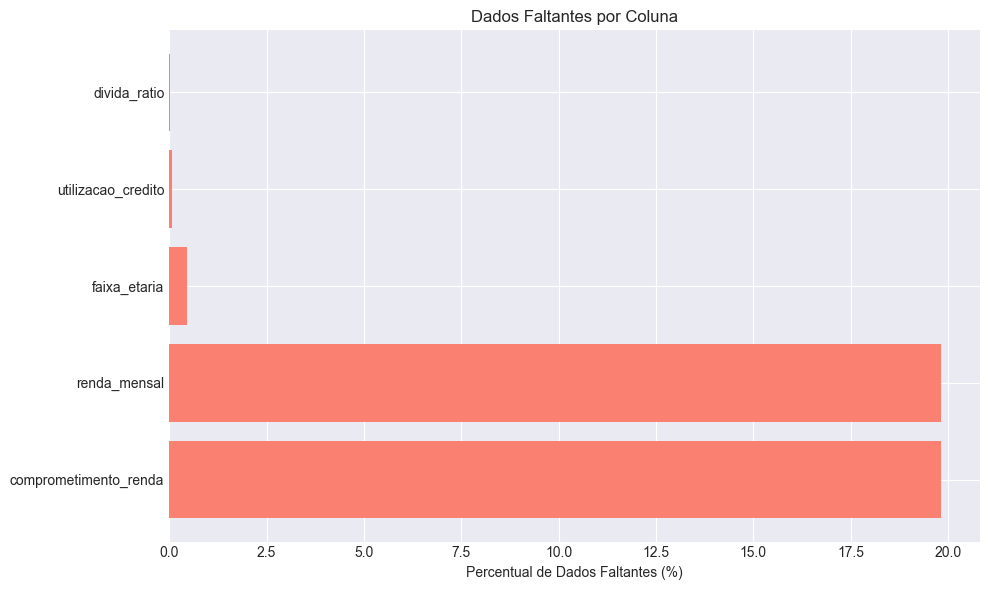

In [22]:
print("=" * 80)
print("❓ ANÁLISE DE DADOS FALTANTES")
print("=" * 80)

# Criar DataFrame com contagem e percentual de valores ausentes
missing = (
    pd.DataFrame({
        "Coluna": df_raw.columns,
        "Missing": df_raw.isnull().sum(),
        "Percentual": (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
    })
    .query("Missing > 0")  # filtra apenas colunas com valores ausentes
    .sort_values("Missing", ascending=False)
    .reset_index(drop=True)
)

# Exibir tabela ou mensagem
if not missing.empty:
    display(missing.style.background_gradient(cmap="Reds"))
    
    # Visualização gráfica
    plt.figure(figsize=(10, 6))
    plt.barh(missing["Coluna"], missing["Percentual"], color="salmon")
    plt.xlabel("Percentual de Dados Faltantes (%)")
    plt.title("Dados Faltantes por Coluna")
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum dado faltante encontrado!")


🎯 ANÁLISE DA VARIÁVEL TARGET: inadipl_90dias_ult2anos


,inadipl_90dias_ult2anos,Quantidade,Percentual (%)
0,False,139974,93.320000
1,True,10026,6.680000


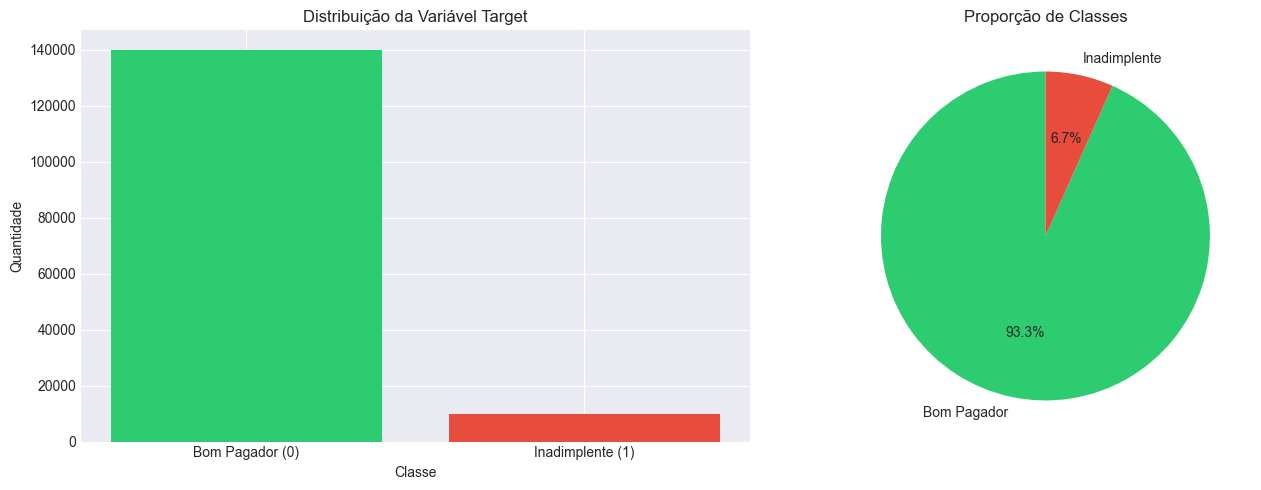


⚖️ Ratio de balanceamento: 1:14.0
   ⚠️ Dataset muito desbalanceado! Considerar técnicas de balanceamento.


In [23]:
# Célula 6: Analisar variável target (inadimplência)
# Ajuste 'SeriousDlqin2yrs' para o nome da sua variável target
target_col = "inadipl_90dias_ult2anos"  # ou 'default', 'target', etc.

print("=" * 80)
print(f"🎯 ANÁLISE DA VARIÁVEL TARGET: {target_col}")
print("=" * 80)

# Distribuição absoluta e percentual
target_dist = df_raw[target_col].value_counts()
target_pct = df_raw[target_col].value_counts(normalize=True).mul(100).round(2)

# Exibir tabela com estilo
target_summary = (
    pd.DataFrame({"Quantidade": target_dist, "Percentual (%)": target_pct})
    .reset_index()
    .rename(columns={"index": "Classe"})
)
display(target_summary.style.background_gradient(cmap="Blues"))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(target_dist.index, target_dist.values, color=["#2ecc71", "#e74c3c"])
axes[0].set_xlabel("Classe")
axes[0].set_ylabel("Quantidade")
axes[0].set_title("Distribuição da Variável Target")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Bom Pagador (0)", "Inadimplente (1)"])

# Gráfico de pizza
axes[1].pie(
    target_dist.values,
    labels=["Bom Pagador", "Inadimplente"],
    autopct="%1.1f%%",
    colors=["#2ecc71", "#e74c3c"],
    startangle=90,
)
axes[1].set_title("Proporção de Classes")

plt.tight_layout()
plt.show()

# Verificar desbalanceamento
ratio = target_dist.min() / target_dist.max()
print(f"\n⚖️ Ratio de balanceamento: 1:{1/ratio:.1f}")
if ratio < 0.1:
    print("   ⚠️ Dataset muito desbalanceado! Considerar técnicas de balanceamento.")


# 4.0.Limpeza e Transformação

In [24]:
#df = df_raw.copy

In [25]:
#filtrando renda_mensal que é ausente e ordenando por idade.
#df[df['renda_mensal'].isnull()].sort_values(by='idade', ascending=False)


In [26]:
#df# filtrando e deletando dados em que a renda_mensal é nula e idade inferior a 18 e superior a 90.
#df[(df['idade'] <=18) | (df_raw['idade']>= 90)]

#df.drop(df[(df_raw['idade'] < 18) | (df_raw['idade'] >= 90)].index, inplace=True)



In [27]:
# utilizacao_credito e divida_ratio está em decimal vou trasnforma em porcentagem para melhor analise.
#Multiplicar por 100 só faz sentido em relatórios ou dashboards, para exibir como porcentagem.
# lembrando que para o modelo deve se usar decimal.
#df['utilizacao_credito'] = df['utilizacao_credito'] * 100
#df['divida_ratio'] = df['divida_ratio'] * 100


In [28]:
#df.isna().sum()                   

In [29]:
# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
#df_raw_sem_renda = df[df['renda_mensal'].isnull()] #  29.413 dados.

# apagando dados sem renda do dataframe
#df = df.dropna(subset=['renda_mensal'])
#df

# Consultando utilizacao_credito sem valores.
#df[df['utilizacao_credito'].isnull()] 

# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
#df_utilizacao_credito_ausente = df[df['utilizacao_credito'].isnull()] # 89 dados.
# apagando dados sem renda do dataframe
#df = df.dropna(subset=['utilizacao_credito'])

# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
#df_divida_ratio_ausente = df[df['divida_ratio'].isnull()]

# apagando dados sem renda do dataframe
#df = df.dropna(subset=['divida_ratio'])

# 5.0.Analise Descritiva


### Distribuição das variáveis numéricas

📊 Analisando 11 variáveis numéricas


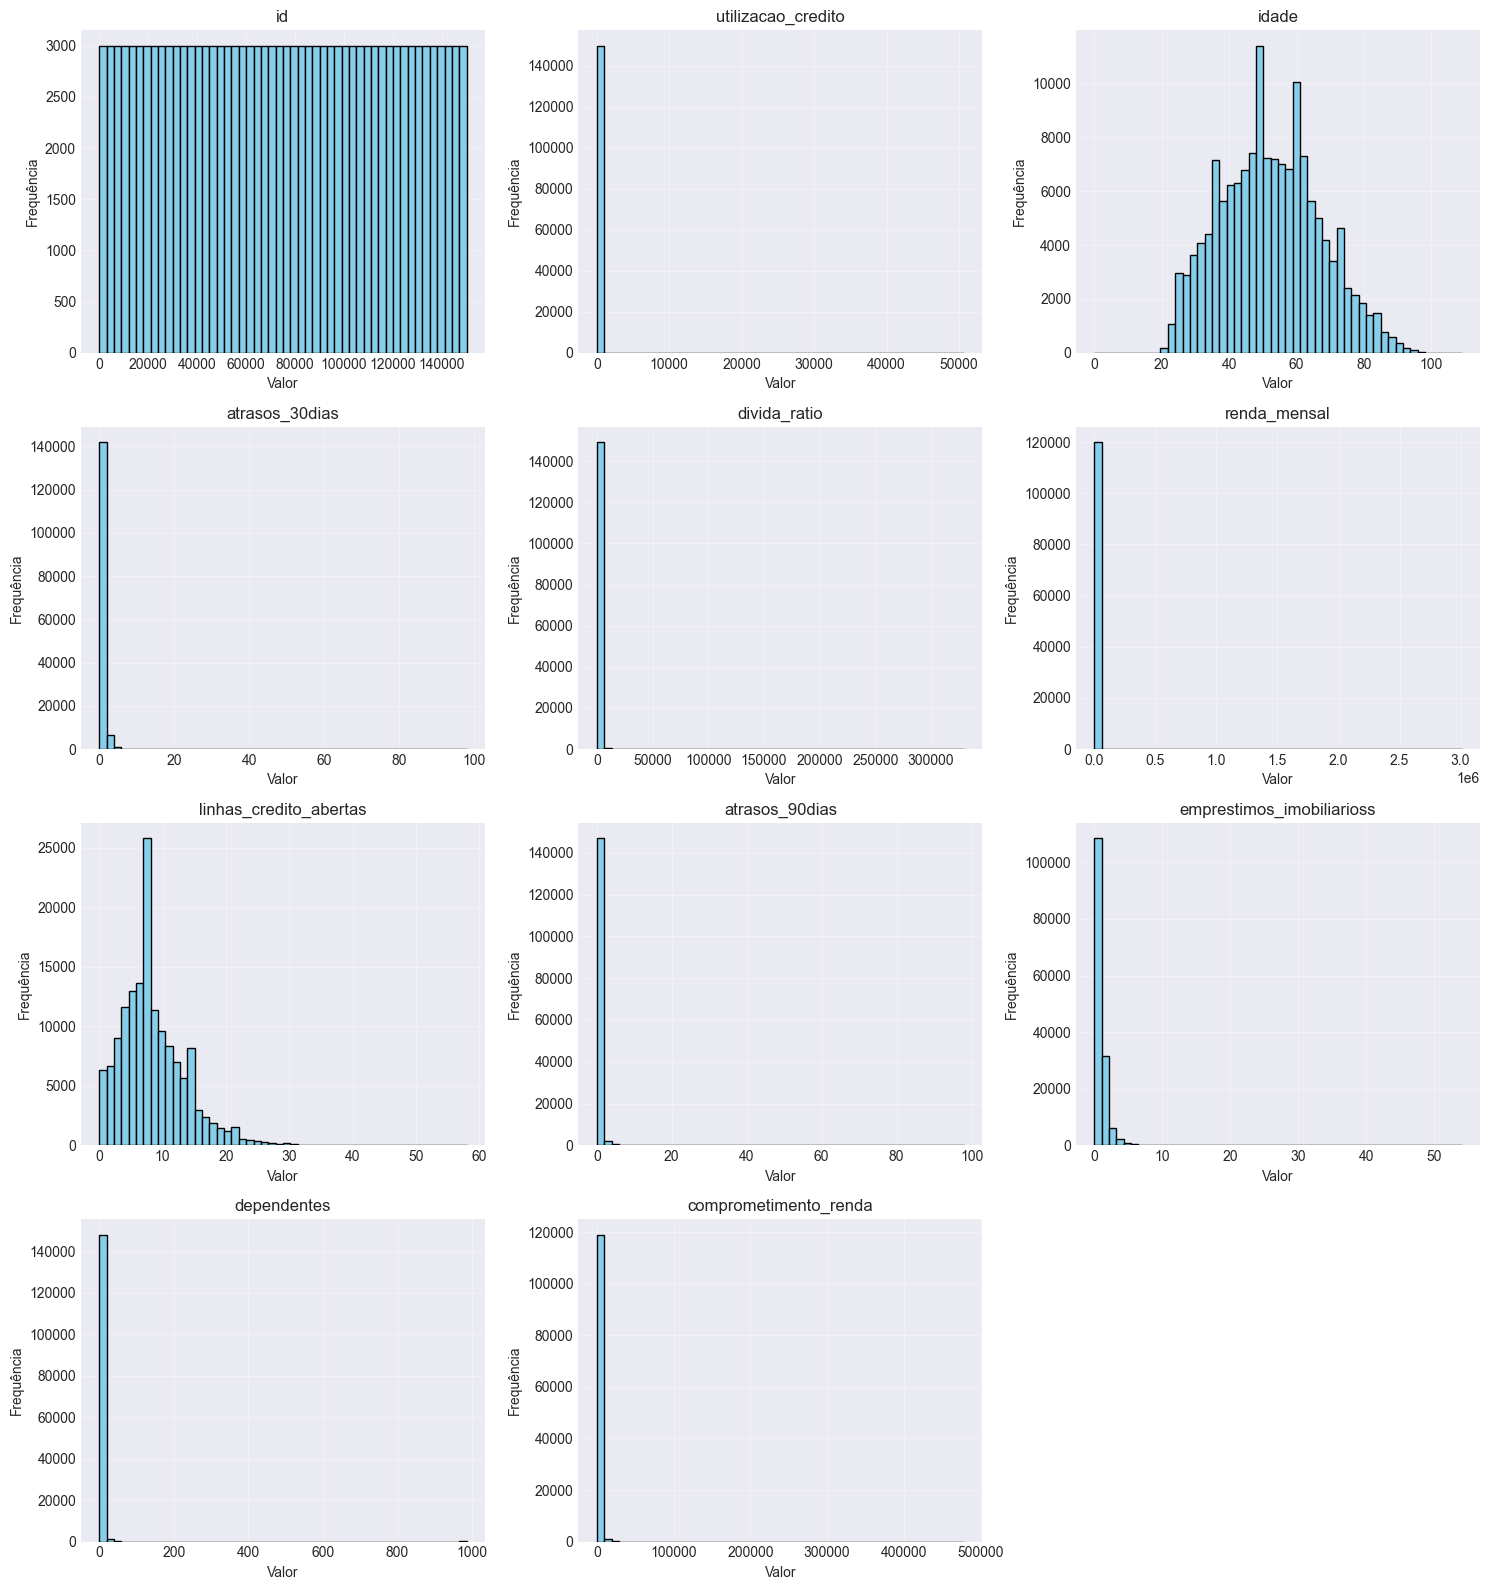

In [30]:
# Selecionar colunas numéricas (excluindo a variável target)
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"📊 Analisando {len(numeric_cols)} variáveis numéricas")

# Definir número de colunas e linhas para subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Criar histogramas para cada variável numérica
for idx, col in enumerate(numeric_cols):
    df_raw[col].dropna().hist(bins=50, ax=axes[idx], color="skyblue", edgecolor="black")
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Valor")
    axes[idx].set_ylabel("Frequência")
    axes[idx].grid(alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


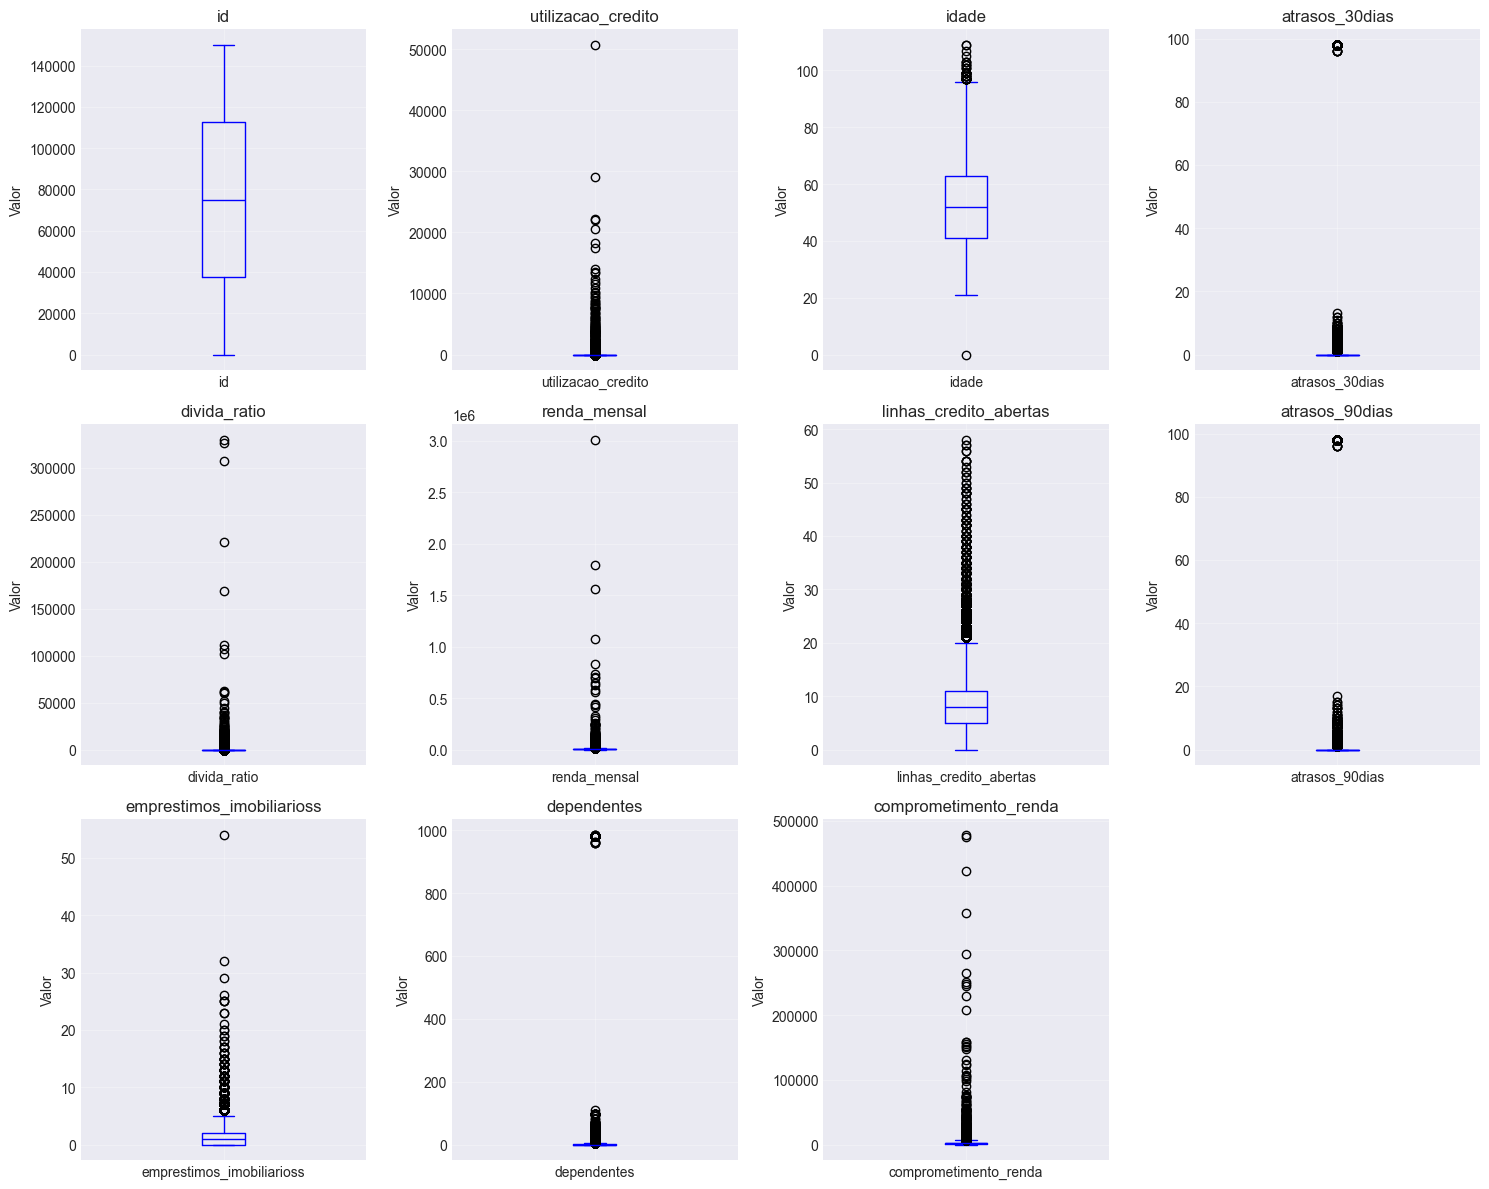

In [31]:
# Célula 8: Boxplots para identificar outliers
# Definir número de colunas e linhas para subplots
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Criar boxplots para cada variável numérica
for idx, col in enumerate(numeric_cols):
    df_raw[col].dropna().plot.box(ax=axes[idx], vert=True, color="blue")
    axes[idx].set_title(col)
    axes[idx].set_ylabel("Valor")
    axes[idx].grid(alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [34]:
df_raw[df_raw['renda_mensal'] > 1000000]

,id,inadipl_90dias_ult2anos,utilizacao_credito,idade,atrasos_30dias,divida_ratio,renda_mensal,linhas_credito_abertas,atrasos_90dias,emprestimos_imobiliarioss,dependentes,comprometimento_renda,faixa_etaria
32534,32535,False,0.0675,76,0,44.1737,5993.0,16,0,0,1,264732.98,60+
34109,34110,False,0.0000,63,5,30.3265,8300.0,16,1,2,10,251709.95,60+
50216,50217,False,0.3406,63,0,28.1715,15000.0,14,0,4,1,422572.50,60+
55486,55487,False,0.2286,65,0,65.7122,7223.0,14,0,0,0,474639.22,60+
59909,59910,True,0.6990,48,0,35.4408,13500.0,11,0,0,1,478450.80,46-60
78543,78544,False,2.1596,45,0,14.8379,16500.0,8,0,1,3,244825.35,36-45
80263,80264,False,0.1613,31,1,33.6110,6166.0,14,0,2,2,207245.43,26-35
95477,95478,False,0.0711,53,0,8.8527,33333.0,8,0,0,0,295087.05,46-60
96899,96900,False,0.0045,74,0,38.2011,6000.0,6,0,0,0,229206.60,60+
106066,106067,True,0.9107,69,5,95.3009,2601.0,14,1,2,51,247877.64,60+


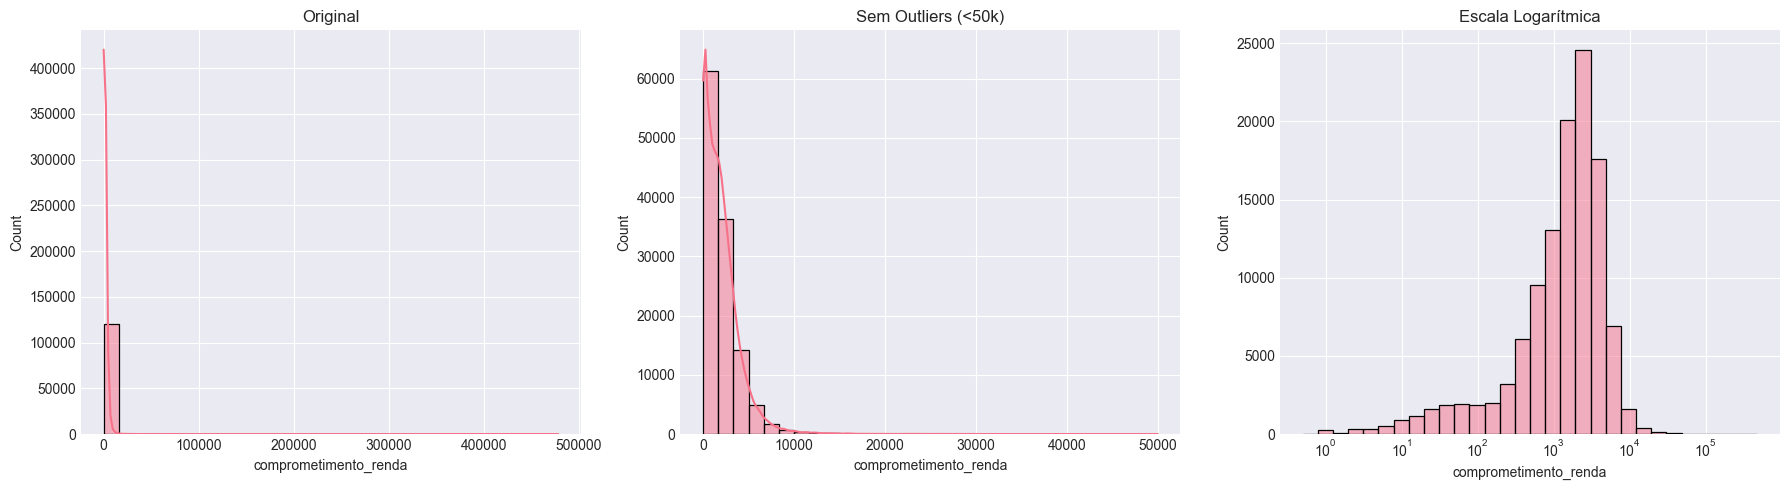

In [16]:
# comparando dados original, sem outliers(abaixo de 50.000),e escala logaritmica
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Original
sns.histplot(df_raw['comprometimento_renda'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original")

# 2. Sem outliers (exemplo: abaixo de 50 mil)
sns.histplot(df_raw[df_raw['comprometimento_renda'] < 50000]['comprometimento_renda'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Sem Outliers (<50k)")

# 3. Escala logarítmica
sns.histplot(df_raw['comprometimento_renda'], bins=30, kde=True, log_scale=True, ax=axes[2])
axes[2].set_title("Escala Logarítmica")

plt.tight_layout()
plt.show()


## 5.5 Correlações

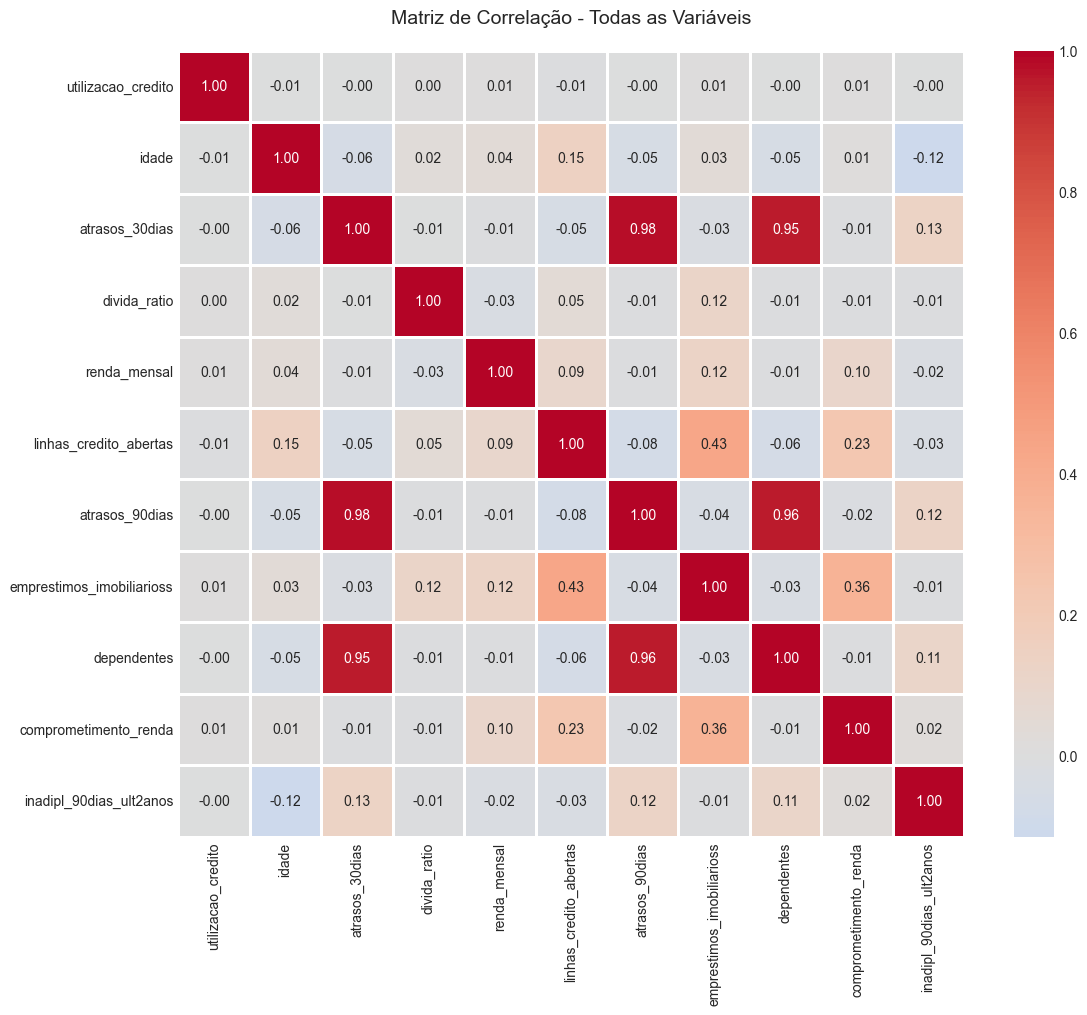


🎯 Correlação com a variável target:


,Correlação
inadipl_90dias_ult2anos,1.000000
atrasos_30dias,0.131503
atrasos_90dias,0.122492
dependentes,0.105021
comprometimento_renda,0.022231
utilizacao_credito,-0.001828
divida_ratio,-0.007769
emprestimos_imobiliarioss,-0.007865
renda_mensal,-0.019814
linhas_credito_abertas,-0.030884


In [20]:
# Célula 9: Matriz de correlação
# Definir colunas numéricas 
numeric_cols = [ 'utilizacao_credito', 'idade', 'atrasos_30dias', 'divida_ratio', 'renda_mensal',
                 'linhas_credito_abertas', 'atrasos_90dias', 'emprestimos_imobiliarioss', 'dependentes', 
                 'comprometimento_renda' ]

target_col = "inadipl_90dias_ult2anos"
# Calcular correlação
corr_matrix = df_raw[numeric_cols + [target_col]].corr()

# Visualizar matriz de correlação com heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1
)
plt.title("Matriz de Correlação - Todas as Variáveis", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Correlação com a variável target
print("\n🎯 Correlação com a variável target:")
target_corr = corr_matrix[target_col].sort_values(ascending=False)

# Exibir tabela estilizada
display(
    target_corr.to_frame(name="Correlação")
    .style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)
)


# 6.0 Principais insights

In [14]:
insights = """
1. BALANCEAMENTO DE CLASSES:
   - Dataset desbalanceado com 6,7% de inadimplentes
   - Será necessário aplicar técnicas de balanceamento (SMOTE, undersampling)

2. VARIÁVEIS MAIS CORRELACIONADAS COM INADIMPLÊNCIA:
   - [atrasos_30dias
   - atrasos_90dias
   - dependentes]
   
3. DADOS FALTANTES:
    - comprometimento_renda	29749	19.83%
    - renda_mensal	29731	19.82%
	- faixa_etaria	688	0.46%
	- utilizacao_credito	114	0.08%
	- divida_ratio	18	0.01%
    - Estratégia: [imputação pela mediana/moda ou remoção]

4. OUTLIERS IDENTIFICADOS:
   - [Variáveis com outliers significativos:utilization_credit, fico, atrasos_30dias,
       divida_ratio, linhas_credito_abertas, atrasos_90dias e dependentes]
   - Decisão: [manter, remover ou tratar]

5. PRÓXIMOS PASSOS:
   - Feature engineering
   - Tratamento de dados faltantes
   - Balanceamento de classes
   - Modelagem
"""

print(insights)


1. BALANCEAMENTO DE CLASSES:
   - Dataset desbalanceado com 6,7% de inadimplentes
   - Será necessário aplicar técnicas de balanceamento (SMOTE, undersampling)

2. VARIÁVEIS MAIS CORRELACIONADAS COM INADIMPLÊNCIA:
   - [atrasos_30dias
   - atrasos_90dias
   - dependentes]

3. DADOS FALTANTES:
    - comprometimento_renda	29749	19.83%
    - renda_mensal	29731	19.82%
	- faixa_etaria	688	0.46%
	- utilizacao_credito	114	0.08%
	- divida_ratio	18	0.01%
    - Estratégia: [imputação pela mediana/moda ou remoção]

4. OUTLIERS IDENTIFICADOS:
   - [Variáveis com outliers significativos:utilization_credit, fico, atrasos_30dias,
       divida_ratio, linhas_credito_abertas, atrasos_90dias e dependentes]
   - Decisão: [manter, remover ou tratar]

5. PRÓXIMOS PASSOS:
   - Feature engineering
   - Tratamento de dados faltantes
   - Balanceamento de classes
   - Modelagem



In [15]:
# consultar a versão das libs
#!pip list
import os

caminho_dir = r"C:\Users\wesle\anaconda3\envs\Credit_Score_Project\data\raw_data"
os.makedirs(caminho_dir, exist_ok=True)

df_raw.to_csv(os.path.join(caminho_dir, "df_raw.csv"), index=False, encoding="utf-8-sig")

